<h1 style="margin-left: 20px; color:blue">1. Importing the required libraries</h1>

In [9]:
import requests
import zipfile
import io
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt

<h1 style="margin-left: 20px; color:blue">2. Loading the data into the data frame</h1>

In [2]:
def load_credit_approval_data(url):
    """
    Loads credit approval data from a zip archive located at the given URL.
    
    Args:
    - url (str): URL pointing to the zip archive containing credit approval data.
    
    Returns:
    - pd.DataFrame: DataFrame containing the loaded credit approval data.
      Each column in the DataFrame is annotated with 'documentation'.
      'documentation' provides a brief description of the column's contents.
      
    Documentation for Columns:
    - A1: b, a.
    - A2: continuous.
    - A3: continuous.
    - A4: u, y, l, t.
    - A5: g, p, gg.
    - A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    - A7: v, h, bb, j, n, z, dd, ff, o.
    - A8: continuous.
    - A9: t, f.
    - A10: t, f.
    - A11: continuous.
    - A12: t, f.
    - A13: g, p, s.
    - A14: continuous.
    - A15: continuous.
    - A16: +,- (class attribute)
    """
    # Step 1: Download the zip file from the given URL
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to download file from {url}")
    
    # Step 2: Unzip the file
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    
    # Step 3: Read the crx.data file into a pandas DataFrame
    with zip_file.open('crx.data') as data_file:
        # Assuming the data file is in CSV format with no header
        column_names = [
            'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'A11', 'A12', 'A13', 'A14', 'A15', 'A16'
        ]
        df = pd.read_csv(data_file, header=None, names=column_names)
    
    return df


url = 'https://archive.ics.uci.edu/static/public/27/credit+approval.zip'
df = load_credit_approval_data(url)

<h1 style="margin-left: 20px; color:blue">3. Exploratory Data Analysis</h1>

In [3]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> <p style="color:red">From the report <code>ydata_profiling</code>, we observe:  <br>
A1, A4, A5, A6, A7 - contain the unacceptable symbol '?' >>> will replace with np.NaN in the future.  <br>
A2, A14 - text - >>> transform into numerical format.  <br>
A3, A8, A10 - contain zero values >>> will perform scaling.  <br>
A15 - contains zero values - and likely has significant outliers.</p>

<h1 style="margin-left: 20px; color:blue">4. Feature Engineering</h1>

<h1 style="margin-left: 200px; color:orange">4.1 Handling Missing Values. Identify columns containing  question mark '?'</h1>

In [5]:
columns_with_question_mark = df.columns[df.apply(lambda x: x.astype(str).str.contains(r'\?').any())].tolist()

print("columns containing question mark'?':", columns_with_question_mark)

columns containing question mark'?': ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']


<h1 style="margin-left: 200px; color:orange">4.2 Handling Missing Values. Determining Data Types</h1>

In [6]:
import numpy as np
df = load_credit_approval_data(url)
df['A1'] = df['A1'].replace('?', np.nan)
df['A1'] = df['A1'].astype('category')
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')
df['A3'] = df['A3'].astype(float)
df['A4'] = df['A4'].replace('?', np.nan)
df['A4'] = df['A4'].astype('category')
df['A5'] = df['A5'].replace('?', np.nan)
df['A5'] = df['A5'].astype('category')
df['A6'] = df['A6'].replace('?', np.nan)
df['A6'] = df['A6'].astype('category')
df['A7'] = df['A7'].replace('?', np.nan)
df['A7'] = df['A7'].astype('category')
df['A8'] = df['A8'].astype(float)
df['A11'] = df['A11'].astype(int)
df['A14'] = pd.to_numeric(df['A14'], errors='coerce')
df['A15'] = df['A15'].astype(int)

<h1 style="margin-left: 200px; color:orange">4.3 Convert categorical columns to dummy variables. Replace specific values with numerical equivalents</h1>

In [7]:
df = pd.get_dummies(df, columns=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])
df = df.replace({True: 1, False: -1, '+': 1, '-': -1})
df

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,1,-1,1,-1,...,-1,-1,1,-1,1,1,-1,1,-1,-1
1,58.67,4.460,3.04,6,43.0,560,1,1,-1,-1,...,-1,-1,1,-1,1,1,-1,1,-1,-1
2,24.50,0.500,1.50,0,280.0,824,1,1,-1,-1,...,-1,-1,1,1,-1,1,-1,1,-1,-1
3,27.83,1.540,3.75,5,100.0,3,1,-1,1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,-1
4,20.17,5.625,1.71,0,120.0,0,1,-1,1,-1,...,-1,-1,1,1,-1,1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,-1,-1,1,-1,...,-1,1,-1,1,-1,1,-1,1,-1,-1
686,22.67,0.750,2.00,2,200.0,394,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,1,-1,-1
687,25.25,13.500,2.00,1,200.0,1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,1,-1,-1
688,17.92,0.205,0.04,0,280.0,750,-1,-1,1,-1,...,-1,1,-1,1,-1,1,-1,1,-1,-1


<h1 style="margin-left: 200px; color:red">Visualize missing values</h1>


Text(0, 0.5, 'Rows in Dataset')

<Figure size 1000x600 with 0 Axes>

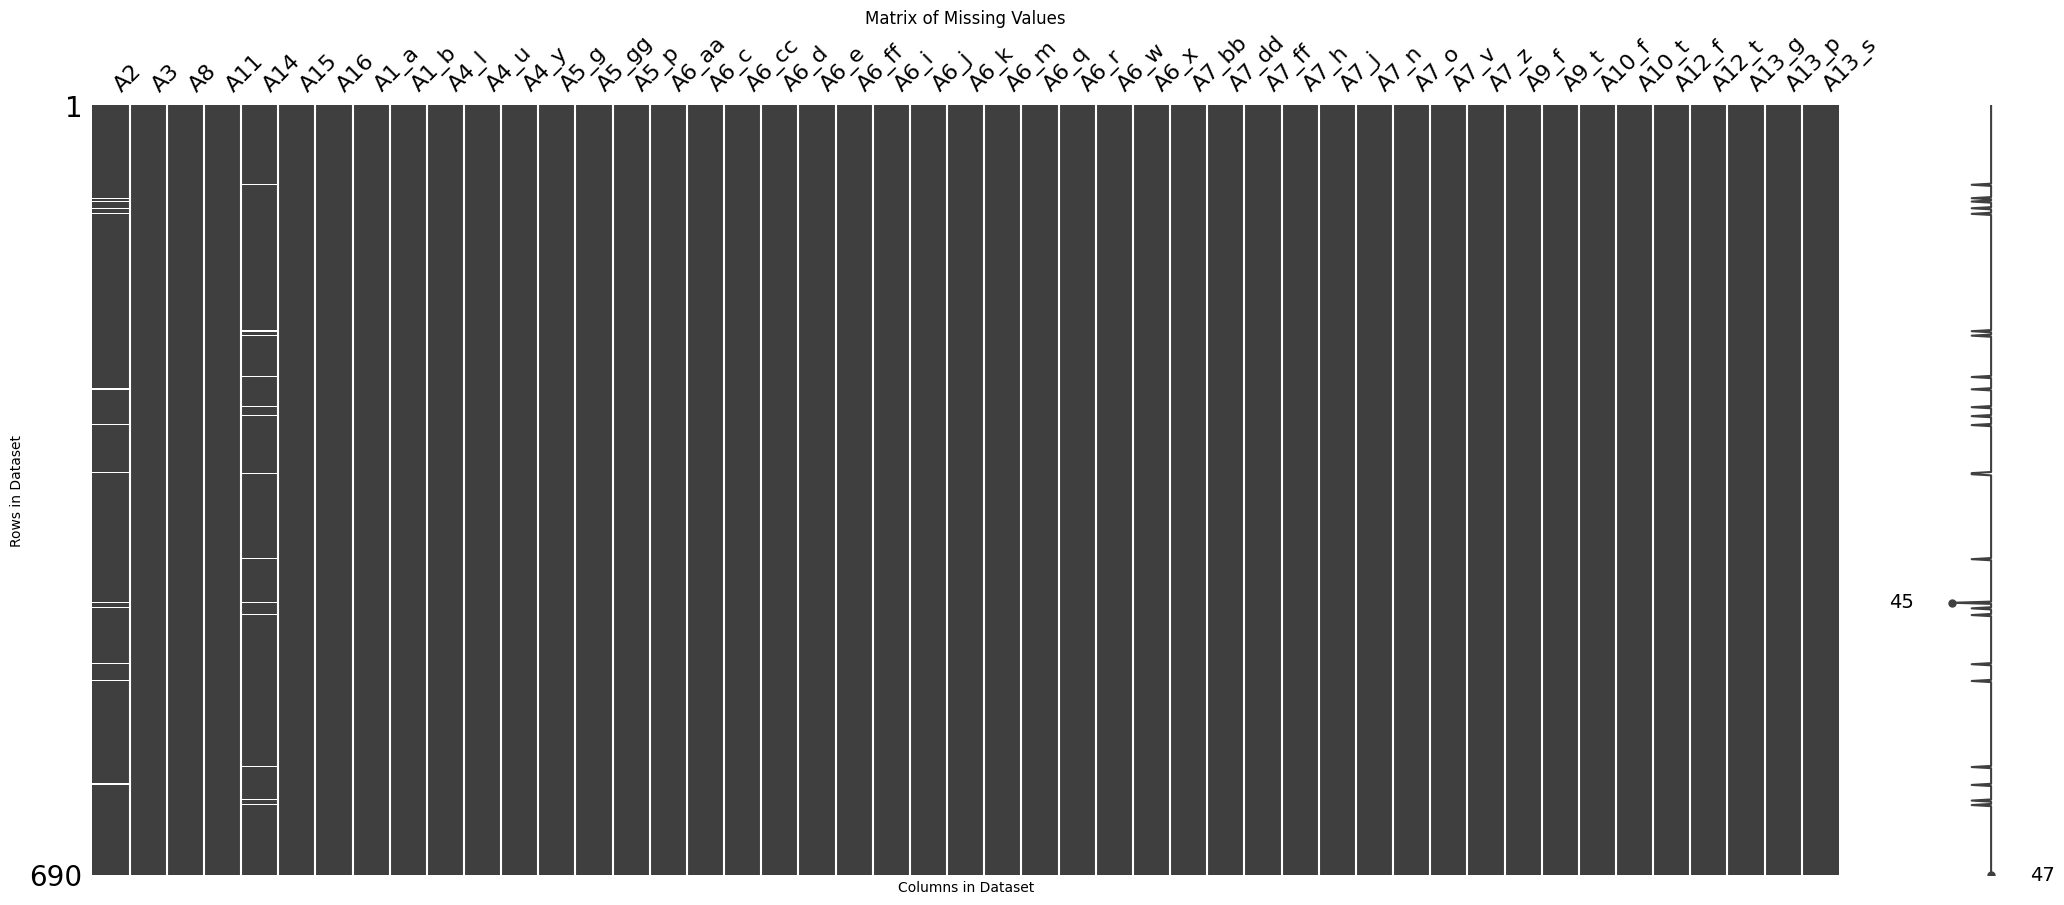

In [12]:
%matplotlib inline

plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Matrix of Missing Values')
plt.xlabel('Columns in Dataset')
plt.ylabel('Rows in Dataset')

<h1 style="margin-left: 200px; color:red">Drop rows with missing values</h1>

In [13]:
df = df.dropna()

<h1 style="margin-left: 200px; color:red">Separate features (X) and target (y)</h1>

In [14]:
y = df['A16']
X = df.drop(columns='A16')

<h1 style="margin-left: 200px; color:red">Standardize features</h1>

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h1 style="margin-left: 200px; color:red">Split data into training and testing sets</h1>

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1 style="margin-left: 20px; color:blue">5. Building models </h1>

<h1 style="margin-left: 200px; color:orange">5.1 Creating and training a DecisionTreeClassifier model.</h1>

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creating and training the DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediction on the test dataset
y_pred_dt = clf.predict(X_test)

# Model performance evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.2f}')

# Classification report output
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.79
              precision    recall  f1-score   support

          -1       0.80      0.82      0.81        73
           1       0.78      0.75      0.77        61

    accuracy                           0.79       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.79      0.79      0.79       134



<h1 style="margin-left: 200px; color:orange">5.2 Creating and training a Logistic Regression model.</h1>

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Prediction on the test dataset for LogisticRegression
y_pred_logreg = logreg.predict(X_test)

# LogisticRegression Performance Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')

# Outputting the classification report for LogisticRegression
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82        73
           1       0.79      0.79      0.79        61

    accuracy                           0.81       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134



<h1 style="margin-left: 200px; color:orange">5.3 Creating and training a KNeighbors Classifier model.</h1>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediction on the test set for KNeighborsClassifier
y_pred_knn = knn.predict(X_test)

# Performance evaluation of KNeighborsClassifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')

# Performance evaluation of KNeighborsClassifierOutput of classification report for KNeighborsClassifier
print(classification_report(y_test, y_pred_knn))

k-Nearest Neighbors Accuracy: 0.78
              precision    recall  f1-score   support

          -1       0.78      0.82      0.80        73
           1       0.77      0.72      0.75        61

    accuracy                           0.78       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



<h1 style="margin-left: 200px; color:red">Compare the results of the built models based on their metrics.</h1>

In [21]:
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')
print(classification_report(y_test, y_pred_logreg))

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(classification_report(y_test, y_pred_dt))

print(f'k-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')
print(classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82        73
           1       0.79      0.79      0.79        61

    accuracy                           0.81       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134

Decision Tree Accuracy: 0.79
              precision    recall  f1-score   support

          -1       0.80      0.82      0.81        73
           1       0.78      0.75      0.77        61

    accuracy                           0.79       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.79      0.79      0.79       134

k-Nearest Neighbors Accuracy: 0.78
              precision    recall  f1-score   support

          -1       0.78      0.82      0.80        73
           1       0.77      0.72      0.75        61

    accuracy                           0.78       134
   macro avg       0.78      

<h1 style="margin-left: 200px; color:red">Let's try to improve the logistic regression and DecisionTreeClassifier models</h1>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 10], # if add 20 Accuracy: 0.84
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
# Creating a GridSearchCV Object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting a model using grid search
grid_search.fit(X_train, y_train)

# Output of the best parameters
print("Best Parameters found: ", grid_search.best_params_)


# Getting the best model
best_clf = grid_search.best_estimator_

# Prediction on the test set
y_pred_dt = best_clf.predict(X_test)

# Model performance evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.2f}')

# Evaluate model performanceOutput classification report
print(classification_report(y_test, y_pred_dt))

Best Parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.85
              precision    recall  f1-score   support

          -1       0.87      0.85      0.86        73
           1       0.83      0.85      0.84        61

    accuracy                           0.85       134
   macro avg       0.85      0.85      0.85       134
weighted avg       0.85      0.85      0.85       134



In [32]:
# Creating a logistic regression model
logreg = LogisticRegression(random_state=42, solver='liblinear')

# Defining a grid of parameters for enumeration
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],  # обратная сила регуляризации
    'penalty': ['l2', 'l1']  # тип регуляризации
}


# Create a GridSearchCV object to iterate through parameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Training GridSearch using training data
grid_search.fit(X_train, y_train)

# We display the best parameters and results
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)
print()

# We predict on a test set with the best parameters
best_logreg = grid_search.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

# Evaluating the performance of logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')

# Printing a classification report for logistic regression
print(classification_report(y_test, y_pred_logreg))

Best Hyperparameters for Logistic Regression:
{'C': 0.5, 'penalty': 'l1'}

Logistic Regression Accuracy: 0.83
              precision    recall  f1-score   support

          -1       0.86      0.82      0.84        73
           1       0.80      0.84      0.82        61

    accuracy                           0.83       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.83      0.83      0.83       134

